In [1]:
#pip install wordcloud

In [3]:
#pip install circlify

### Word cloud

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import circlify
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv('output_clean_lyrics.csv')

In [6]:
# Can't pass a dataframe, need to chunk the lyrics into text based on 
# discriminatory blocks; genre, style, artist, time period (week, month, year)

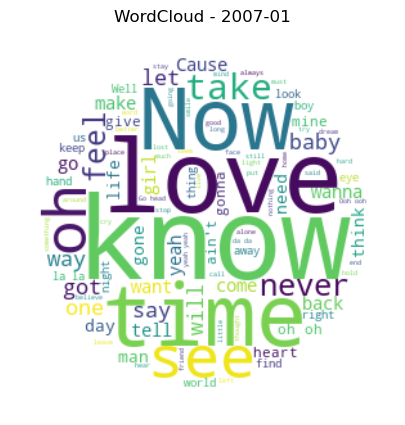

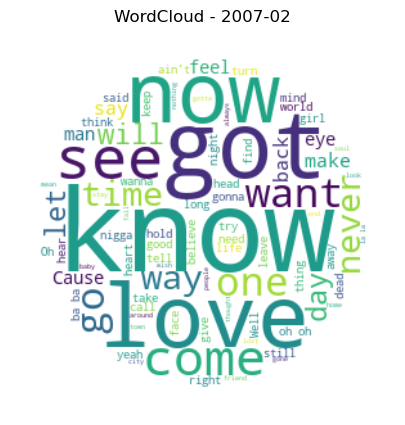

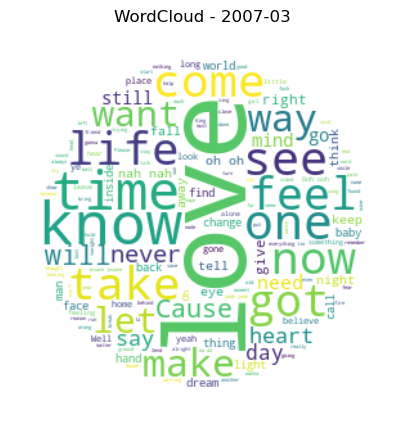

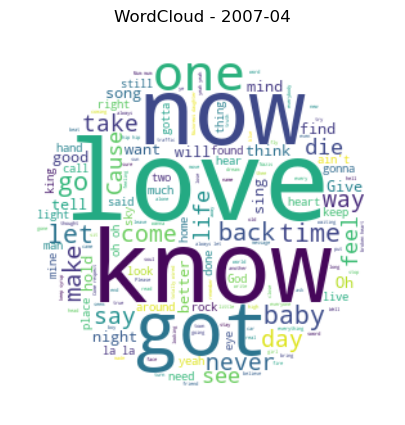

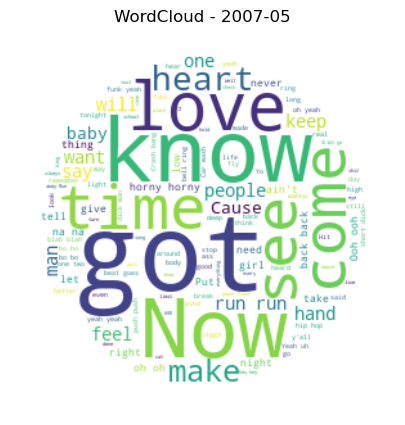

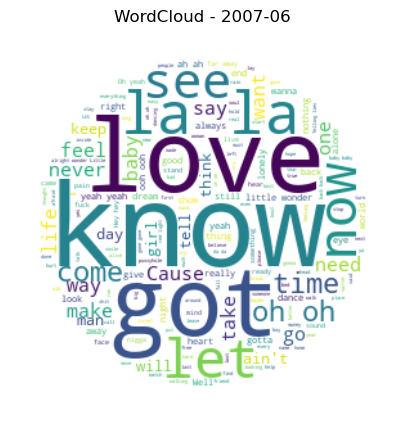

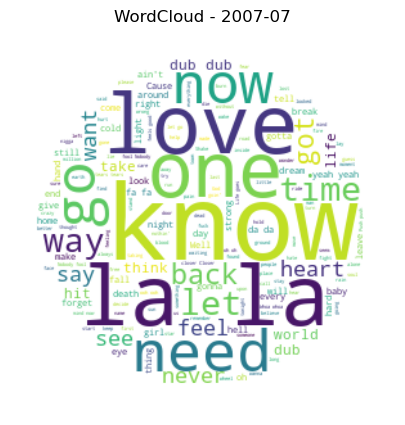

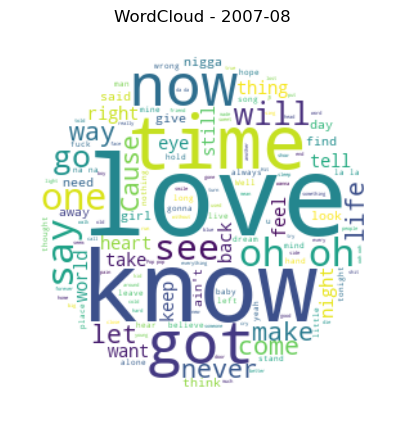

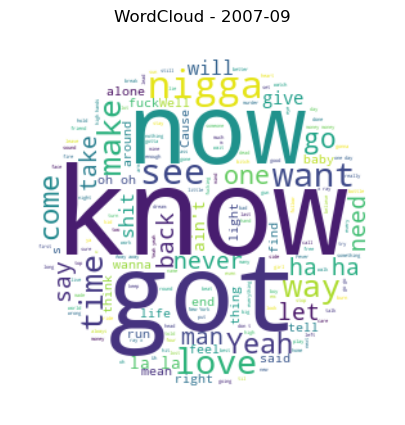

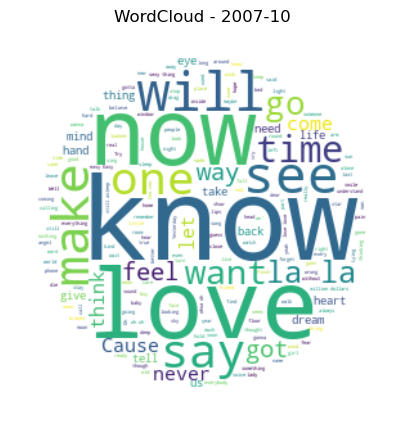

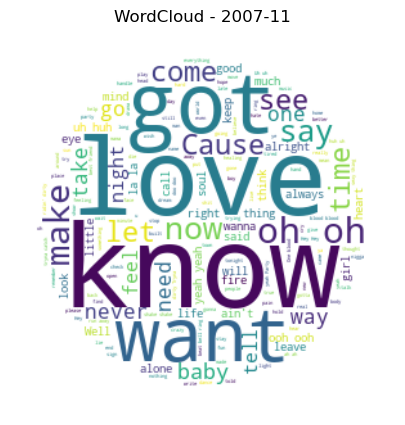

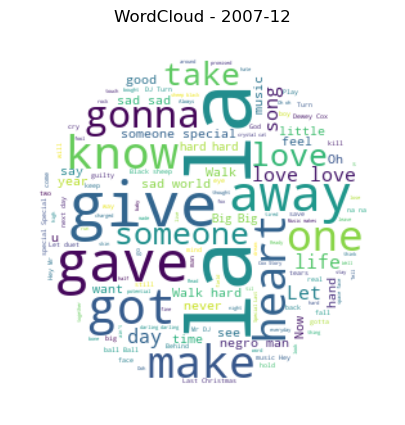

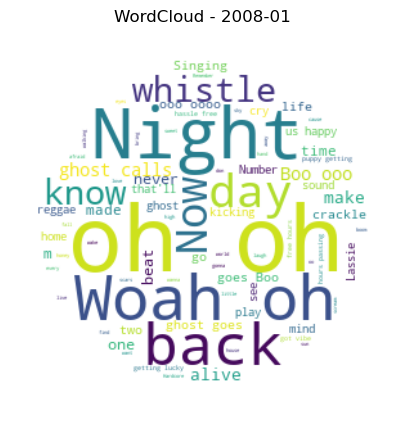

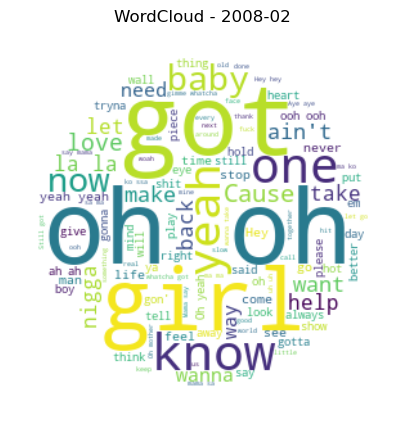

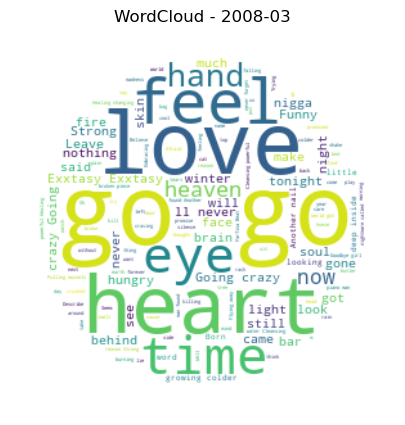

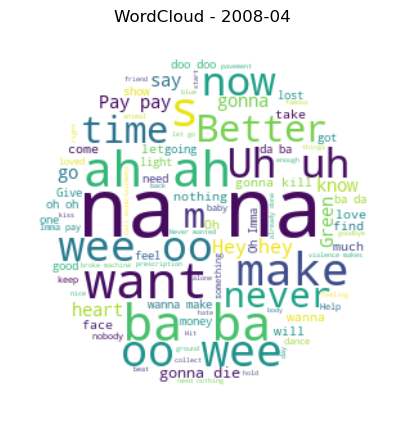

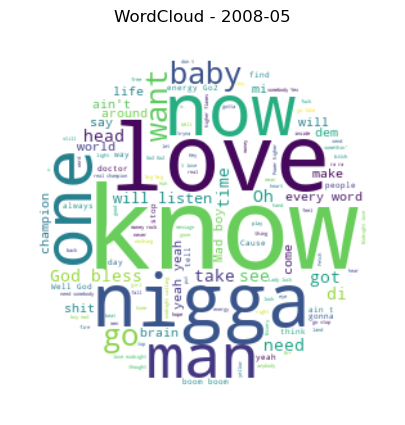

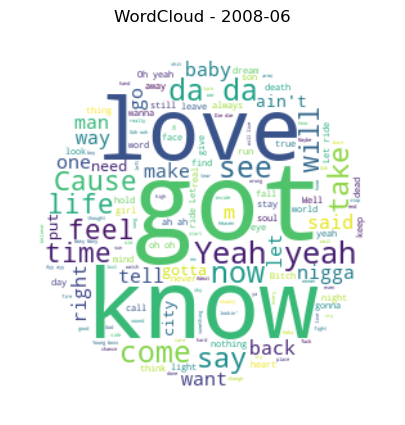

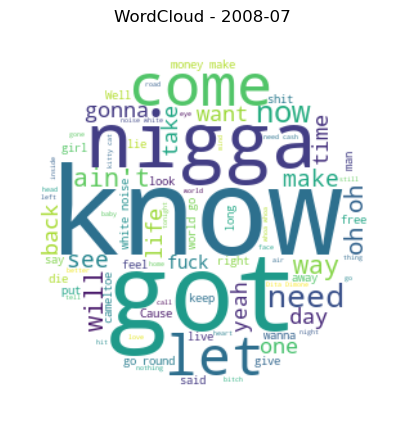

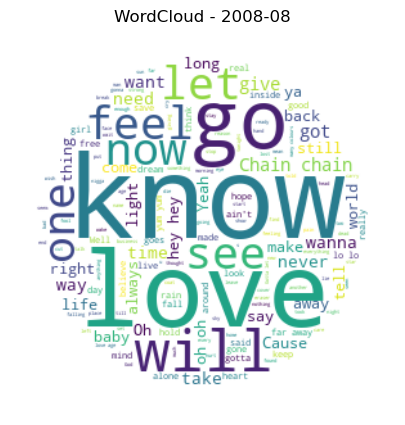

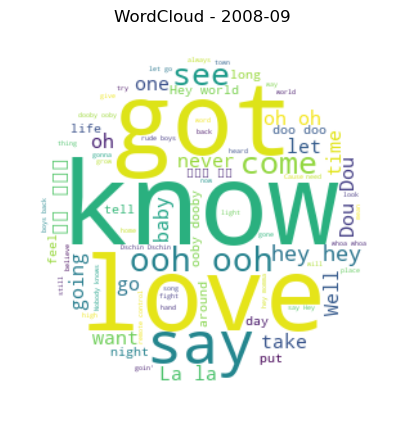

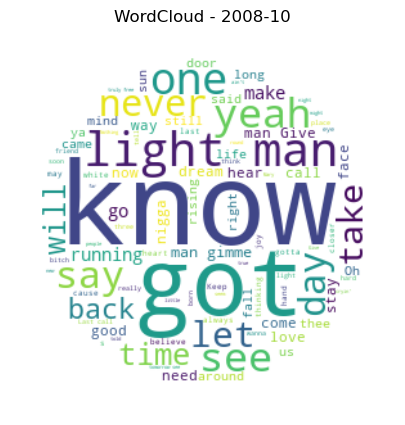

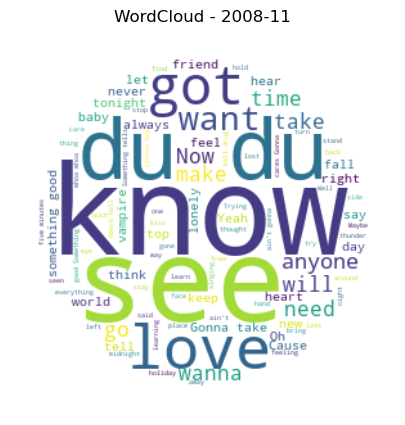

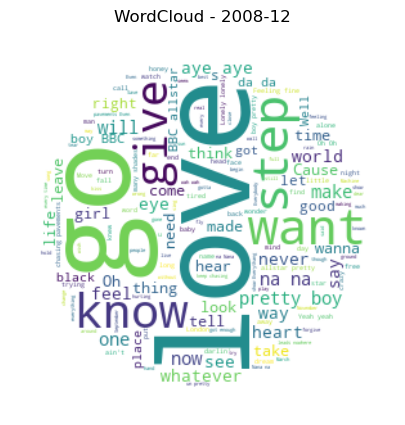

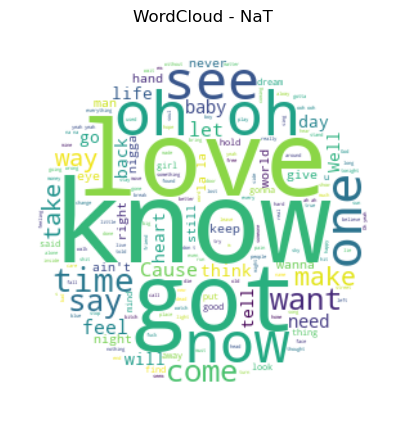

In [5]:
# Convert 'release_date' to datetime and extract 'month'
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['month'] = df['release_date'].dt.to_period('M').astype(str) 

# Group lyrics by month and combine into single text block
monthly_lyrics = df.groupby('month')['clean_lyrics'].apply(lambda x: ' '.join(x.dropna())).reset_index()

for _, row in monthly_lyrics.iterrows():
    month = row['month']
    text = row['clean_lyrics']
    
    if not text.strip():
        continue  # Skip empty months

    x, y = np.ogrid[:300, :300]

    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)

    wordcloud = WordCloud(width=400, height=200, background_color='white', mask=mask).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - {month}')
    plt.show()

In [ ]:
wc = WordCloud().generate(text)    
plt.imshow(wc)

In [ ]:
# Wordcloud adjustments
# to turn off axes labels
plt.axis("off")
# background color
background_color
# max num of unique words used
max_words
# a stopword list to exclude the words you don't want to display
stopwords
# color theme
colormap
# width of Wordcloud image
width
# height of Wordcloud image
height: The height of the WordCloud image

In [ ]:
# Example of colorization
wc = WordCloud(background_color='white', colormap = 'binary', 
               stopwords = ['meta'], width = 800, height = 500).generate(text)
plt.axis("off")
plt.imshow(wc)

### Add it to a Packed Bubble Chart

Use Matplotlib for packed bubble chart - OR - Seaborn for replot (modifiable for bubbles).

In [28]:
for _, row in monthly_lyrics.iterrows():
    month = row['month']
    text = row['clean_lyrics']
    
    if not text.strip():
        continue  # skip if lyrics are empty

    # Generate word frequencies using WordCloud
    wordcloud = WordCloud(max_words=50).generate(text)
    frequencies = wordcloud.words_  # dict: {word: freq}

    # Prepare data for circlify
    data = [{"id": word, "value": freq} for word, freq in frequencies.items()]

    # Generate packed circle layout
    circles = circlify.circlify(
        data,
        show_enclosure=False,
        target_enclosure=circlify.Circle(x=0, y=0, r=1)
    )

    # Plot packed bubble chart
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axis('off')
    ax.set_title(f'Packed Bubble Chart - {month}', fontsize=14)

    for circle in circles:
        if circle.level == 1:  # Plot only leaf nodes
            x, y, r = circle.x, circle.y, circle.r
            label = circle.ex["id"]
            ax.add_patch(plt.Circle((x, y), r, alpha=0.5, edgecolor='black', facecolor='skyblue'))
            ax.text(x, y, label, ha='center', va='center', fontsize=9)

KeyError: 'datum'